In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [23]:
import requests
import urllib
from bs4 import BeautifulSoup
import re
import io
import gzip
import time
import csv
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from multiprocessing import Pool
import import_ipynb
import pandas as pd
from ipynb.fs.full.scrape_daily import scrape_daily

driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
driver.get(url)

symbols = list()
symbols_GICC = dict()

table = "/html/body/div[3]/div[3]/div[5]/div[1]/table[1]"
table = driver.find_element_by_xpath(table)
elements = table.find_elements_by_tag_name("tr")[1:]

for row in elements:
    data = [data.text for data in row.find_elements_by_tag_name("td")]
    symbols.append(data[0])
    symbols_GICC[data[0]] = data[3]

print(len(symbols_GICC))



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\mypc\.wdm\drivers\chromedriver\win32\91.0.4472.19\chromedriver.exe] found in cache


505


In [24]:
top_gain_loss_daily = pd.DataFrame(columns=["symbol","gain_loss","GICS"])
top_gain_loss_weekly = pd.DataFrame(columns=["symbol","gain_loss","GICS"])
top_gain_loss_monthly = pd.DataFrame(columns=["symbol","gain_loss","GICS"])

In [35]:
daily_dfs = {}
weekly_dfs = {}
monthly_dfs = {}


def gain_loss(sym):
    df_daily = pd.read_csv(sym +"_daily" + ".csv")
    df_daily["Gain/Loss"] = (df_daily["Close"] - df_daily["Close"].shift(1)) / df_daily["Close"]
    daily_dfs[sym] = df_daily
   

    df_weekly = pd.read_csv(sym +"_weekly"+".csv")
    df_weekly["Gain/Loss"] = (df_weekly["Close"] - df_weekly["Close"].shift(1)) / df_weekly["Close"]
    weekly_dfs[sym] = df_weekly
   

    df_monthly = pd.read_csv(sym + "_monthly" + ".csv")
    df_monthly["Gain/Loss"] = (df_monthly["Close"] - df_monthly["Close"].shift(1)) / df_weekly["Close"]
    monthly_dfs[sym] = df_monthly
    print(monthly_dfs[sym])
    daily = {"symbol":sym,"gain_loss":df_daily["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    weekly = {"symbol":sym,"gain_loss":df_weekly["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    monthly = {"symbol":sym,"gain_loss":df_monthly["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    return (daily,weekly,monthly)

In [36]:
for n in symbols:
    try:
        (daily,weekly,monthly) = gain_loss(n)
        top_gain_loss_daily = top_gain_loss_daily.append(daily, ignore_index=True)
        top_gain_loss_weekly = top_gain_loss_weekly.append(weekly, ignore_index=True)
        top_gain_loss_monthly = top_gain_loss_monthly.append(monthly, ignore_index=True)
    except Exception as e :
        pass

    Unnamed: 0        Date        Open        High         Low       Close  \
0            0  2016-01-01   88.800003   90.820000   79.190002   85.330002   
1            1  2016-02-01   84.129997   92.570000   67.809998   80.010002   
2            2  2016-03-01   80.750000   95.209999   79.620003   94.809998   
3            3  2016-04-01   94.620003  103.169998   93.739998   97.139999   
4            4  2016-05-01   97.610001  101.400002   92.029999   99.309998   
..         ...         ...         ...         ...         ...         ...   
56          56  2020-09-01  307.720001  315.350006  256.170013  277.059998   
57          57  2020-10-01  277.140015  293.470001  242.729996  251.880005   
58          58  2020-11-01  253.419998  292.230011  250.729996  274.100006   
59          59  2020-12-01  272.109985  328.829987  254.410004  324.200012   
60          60  2021-01-01  324.570007  387.399994  308.950012  348.250000   

     Adj Close    Volume  Gain/Loss  
0    85.330002  11631400 

[61 rows x 9 columns]
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01   9.440000   9.590000   8.220000   9.500000   
1            1  2016-02-01   9.470000  10.140000   8.880000   9.800000   
2            2  2016-03-01   9.830000  11.800000   9.760000  11.800000   
3            3  2016-04-01  11.680000  11.690000  10.790000  11.160000   
4            4  2016-05-01  11.150000  11.490000  10.490000  11.090000   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  17.650000  19.120001  17.129999  18.110001   
57          57  2020-10-01  18.240000  20.760000  17.459999  19.500000   
58          58  2020-11-01  19.790001  22.320000  19.670000  20.440001   
59          59  2020-12-01  20.660000  23.620001  20.270000  23.500000   
60          60  2021-01-01  23.709999  28.680000  22.820000  24.389999   

    Adj Close     Volume  Gain/Loss  
0    7.763638  138380800        NaN  
1    8.106147

[61 rows x 9 columns]
    Unnamed: 0        Date        Open        High         Low       Close  \
0            0  2016-01-01   89.669998   90.730003   74.959999   79.180000   
1            1  2016-02-01   78.269997   79.870003   70.690002   79.160004   
2            2  2016-03-01   79.639999   91.250000   79.199997   90.889999   
3            3  2016-04-01   90.430000   94.489998   89.430000   92.949997   
4            4  2016-05-01   92.730003   98.389999   92.410004   96.900002   
..         ...         ...         ...         ...         ...         ...   
56          56  2020-09-01  167.699997  173.350006  154.190002  160.000000   
57          57  2020-10-01  160.600006  168.089996  150.080002  151.520004   
58          58  2020-11-01  152.960007  169.470001  152.300003  163.729996   
59          59  2020-12-01  165.080002  179.789993  164.919998  178.220001   
60          60  2021-01-01  178.279999  178.979996  161.759995  167.110001   

     Adj Close    Volume  Gain/Loss  
0  

[61 rows x 9 columns]
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  57.540001  61.180000  56.150002  61.110001   
1            1  2016-02-01  60.730000  62.529999  58.840000  61.570000   
2            2  2016-03-01  62.130001  63.150002  60.330002  62.660000   
3            3  2016-04-01  62.349998  64.160004  59.480000  62.709999   
4            4  2016-05-01  62.830002  65.529999  62.570000  63.639999   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  43.650002  44.779999  37.590000  38.639999   
57          57  2020-10-01  38.669998  41.259998  35.830002  36.080002   
58          58  2020-11-01  36.490002  41.540001  36.130001  39.830002   
59          59  2020-12-01  40.080002  43.869999  39.910000  41.000000   
60          60  2021-01-01  41.080002  43.040001  40.000000  41.080002   

    Adj Close     Volume  Gain/Loss  
0   45.486942  144461700        NaN  
1   45.829334

    Unnamed: 0        Date        Open        High        Low       Close  \
0            0  2016-01-01  102.309998  103.400002  87.089996   89.559998   
1            1  2016-02-01   89.110001   89.889999  80.500000   86.620003   
2            2  2016-03-01   86.800003   89.769997  85.410004   86.550003   
3            3  2016-04-01   86.610001   92.480003  84.050003   85.099998   
4            4  2016-05-01   85.190002   86.070000  73.309998   74.980003   
..         ...         ...         ...         ...        ...         ...   
56          56  2020-09-01   97.449997  100.089996  92.000000   96.919998   
57          57  2020-10-01   97.320000  100.720001  92.239998   96.070000   
58          58  2020-11-01   97.360001  111.250000  95.709999  103.110001   
59          59  2020-12-01  103.849998  104.430000  95.769997   97.760002   
60          60  2021-01-01   97.849998  112.480003  94.889999  104.199997   

     Adj Close    Volume  Gain/Loss  
0    81.342316  60277000        NaN  

    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  44.250000  45.110001  32.200001  42.540001   
1            1  2016-02-01  41.270000  43.799999  33.230000  38.279999   
2            2  2016-03-01  38.470001  51.810001  36.259998  48.810001   
3            3  2016-04-01  47.459999  58.060001  46.150002  54.400002   
4            4  2016-05-01  54.610001  59.590000  50.080002  57.139999   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  14.670000  15.070000   9.390000   9.470000   
57          57  2020-10-01   9.380000  10.420000   7.450000   8.300000   
58          58  2020-11-01   8.410000  14.410000   7.980000  12.890000   
59          59  2020-12-01  13.400000  16.860001  12.200000  14.190000   
60          60  2021-01-01  14.650000  19.320000  14.030000  14.280000   

    Adj Close     Volume  Gain/Loss  
0   37.806068  137924000        NaN  
1   34.268593  120058700  -0.115042

    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  54.160000  54.900002  45.810001  48.130001   
1            1  2016-02-01  48.099998  49.130001  40.520000  47.959999   
2            2  2016-03-01  48.590000  53.049999  45.740002  52.770000   
3            3  2016-04-01  52.200001  53.209999  48.130001  49.049999   
4            4  2016-05-01  49.330002  51.290001  47.299999  47.740002   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  16.090000  18.920000  13.400000  15.180000   
57          57  2020-10-01  15.430000  16.170000  12.110000  13.710000   
58          58  2020-11-01  13.490000  22.250000  12.930000  19.980000   
59          59  2020-12-01  20.990000  24.379999  19.230000  21.660000   
60          60  2021-01-01  21.700001  21.709999  17.959999  18.670000   

    Adj Close      Volume  Gain/Loss  
0   42.007370   136166500        NaN  
1   41.858994   141008700  -0.003

    Unnamed: 0        Date        Open        High         Low       Close  \
0            0  2016-01-01   79.500000   85.180000   78.010002   85.010002   
1            1  2016-02-01   84.510002   87.839996   82.930000   84.120003   
2            2  2016-03-01   84.610001   91.000000   81.750000   90.660004   
3            3  2016-04-01   90.620003   91.230003   84.769997   89.160004   
4            4  2016-05-01   89.089996   92.320000   86.809998   90.680000   
..         ...         ...         ...         ...         ...         ...   
56          56  2020-09-01  118.050003  121.900002  109.650002  115.040001   
57          57  2020-10-01  114.839996  130.889999  111.540001  123.419998   
58          58  2020-11-01  124.870003  135.600006  122.820000  125.809998   
59          59  2020-12-01  127.000000  128.850006  116.860001  121.410004   
60          60  2021-01-01  121.709999  124.580002  115.980003  118.720001   

     Adj Close    Volume  Gain/Loss  
0    71.377213  27256100 

[61 rows x 9 columns]
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  58.570000  62.340000  57.970001  61.799999   
1            1  2016-02-01  61.810001  69.239998  61.490002  68.160004   
2            2  2016-03-01  68.750000  72.339996  65.599998  71.889999   
3            3  2016-04-01  71.349998  72.410004  67.709999  70.709999   
4            4  2016-05-01  70.779999  73.250000  68.470001  71.629997   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  52.150002  53.580002  48.470001  50.840000   
57          57  2020-10-01  50.799999  60.860001  50.000000  56.040001   
58          58  2020-11-01  56.400002  66.680000  56.000000  61.360001   
59          59  2020-12-01  61.880001  63.830002  60.450001  62.820000   
60          60  2021-01-01  62.759998  63.590000  56.930000  58.160000   

    Adj Close    Volume  Gain/Loss  
0   51.161617  51162800        NaN  
1   56.426796  

[61 rows x 9 columns]
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  70.800003  71.180000  57.150002  71.019997   
1            1  2016-02-01  69.300003  72.769997  63.060001  64.739998   
2            2  2016-03-01  65.099998  77.699997  62.529999  72.580002   
3            3  2016-04-01  70.849998  85.430000  69.660004  82.620003   
4            4  2016-05-01  82.330002  83.940002  77.040001  81.360001   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  44.720001  45.380001  34.900002  35.939999   
57          57  2020-10-01  35.330002  40.150002  31.219999  34.240002   
58          58  2020-11-01  34.889999  54.779999  33.400002  46.880001   
59          59  2020-12-01  48.470001  55.950001  46.310001  49.869999   
60          60  2021-01-01  50.759998  63.029999  48.599998  50.959999   

    Adj Close     Volume  Gain/Loss  
0   65.847458  121728600        NaN  
1   60.185558

[61 rows x 9 columns]
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  42.110001  43.590000  40.009998  43.560001   
1            1  2016-02-01  43.419998  46.669998  42.959999  43.459999   
2            2  2016-03-01  43.740002  50.380001  41.889999  49.610001   
3            3  2016-04-01  49.320000  52.820000  48.919998  51.610001   
4            4  2016-05-01  51.599998  57.250000  50.740002  56.330002   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  53.009998  53.790001  48.610001  50.820000   
57          57  2020-10-01  50.869999  57.200001  50.189999  55.200001   
58          58  2020-11-01  56.009998  62.529999  53.270000  55.410000   
59          59  2020-12-01  56.119999  56.750000  51.880001  55.509998   
60          60  2021-01-01  55.360001  55.639999  52.130001  53.730000   

    Adj Close    Volume  Gain/Loss  
0   36.533726  18879500        NaN  
1   36.449860  

[61 rows x 9 columns]
    Unnamed: 0        Date        Open        High         Low       Close  \
0            0  2016-01-01  101.949997  112.839996   89.370003  112.209999   
1            1  2016-02-01  112.269997  117.589996   96.820000  106.919998   
2            2  2016-03-01  107.830002  116.989998  104.400002  114.099998   
3            3  2016-04-01  113.750000  120.790001  106.309998  117.580002   
4            4  2016-05-01  117.830002  121.080002  115.879997  118.809998   
..         ...         ...         ...         ...         ...         ...   
56          56  2020-09-01  294.709991  303.600006  244.130005  261.899994   
57          57  2020-10-01  265.350006  285.239990  254.820007  263.109985   
58          58  2020-11-01  264.600006  297.380005  257.339996  276.970001   
59          59  2020-12-01  279.160004  291.779999  264.630005  273.160004   
60          60  2021-01-01  274.779999  286.790009  244.610001  258.329987   

     Adj Close     Volume  Gain/Loss  
0 

    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  31.520000  33.110001  30.620001  33.060001   
1            1  2016-02-01  32.990002  34.209999  32.169998  33.470001   
2            2  2016-03-01  33.580002  36.540001  32.570000  35.970001   
3            3  2016-04-01  35.980000  36.320000  31.680000  32.590000   
4            4  2016-05-01  32.680000  34.189999  31.370001  32.810001   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  28.320000  30.020000  27.299999  28.709999   
57          57  2020-10-01  28.799999  33.610001  28.400000  29.719999   
58          58  2020-11-01  30.049999  31.059999  26.170000  26.559999   
59          59  2020-12-01  26.459999  31.700001  26.270000  30.610001   
60          60  2021-01-01  30.610001  32.130001  29.250000  30.760000   

    Adj Close     Volume  Gain/Loss  
0   26.156763   82800800        NaN  
1   26.481155   89721300   0.012592

    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  35.639999  36.430000  31.870001  34.660000   
1            1  2016-02-01  34.250000  36.680000  31.000000  35.849998   
2            2  2016-03-01  36.369999  39.939999  35.970001  39.049999   
3            3  2016-04-01  38.660000  41.240002  36.980000  37.340000   
4            4  2016-05-01  37.369999  37.880001  34.779999  37.349998   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  20.870001  22.200001  19.110001  20.350000   
57          57  2020-10-01  20.309999  23.969999  17.969999  18.750000   
58          58  2020-11-01  19.049999  22.490000  18.950001  21.990000   
59          59  2020-12-01  22.500000  25.340000  22.260000  24.990000   
60          60  2021-01-01  25.000000  28.590000  23.959999  26.290001   

    Adj Close    Volume  Gain/Loss  
0   26.971184  90593100        NaN  
1   27.897198  88599700   0.035661  


[61 rows x 9 columns]
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  56.840000  57.910000  53.529999  56.509998   
1            1  2016-02-01  56.560001  60.180000  54.840000  58.849998   
2            2  2016-03-01  59.250000  63.730000  58.700001  63.349998   
3            3  2016-04-01  62.900002  65.489998  60.040001  61.340000   
4            4  2016-05-01  61.590000  65.110001  61.209999  62.779999   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  63.919998  65.519997  56.919998  61.680000   
57          57  2020-10-01  61.810001  63.290001  58.669998  59.119999   
58          58  2020-11-01  59.790001  62.360001  57.240002  60.820000   
59          59  2020-12-01  60.700001  61.840000  58.099998  58.799999   
60          60  2021-01-01  58.580002  61.459999  53.959999  58.099998   

    Adj Close     Volume  Gain/Loss  
0   46.464367   78473200        NaN  
1   48.766640

    Unnamed: 0        Date        Open        High         Low       Close  \
0            0  2016-01-01  199.550003  203.429993  176.850006  196.690002   
1            1  2016-02-01  195.360001  224.179993  189.570007  216.899994   
2            2  2016-03-01  219.009995  234.770004  214.080002  233.429993   
3            3  2016-04-01  230.380005  239.949997  226.309998  234.520004   
4            4  2016-05-01  234.770004  235.710007  219.380005  228.350006   
..         ...         ...         ...         ...         ...         ...   
56          56  2020-09-01  364.250000  371.869995  337.250000  356.769989   
57          57  2020-10-01  358.170013  392.529999  345.000000  350.019989   
58          58  2020-11-01  354.239990  424.079987  354.239990  418.299988   
59          59  2020-12-01  424.329987  427.899994  400.000000  408.339996   
60          60  2021-01-01  410.440002  411.489990  360.940002  364.390015   

     Adj Close    Volume  Gain/Loss  
0   175.930008  18252600 

    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  61.152943  63.160786  55.937256  59.388233   
1            1  2016-02-01  58.976471  66.674507  56.329411  64.882355   
2            2  2016-03-01  65.082352  68.066666  64.490196  67.698036   
3            3  2016-04-01  67.431374  68.529411  64.964706  66.156860   
4            4  2016-05-01  66.219604  68.584312  64.768623  68.129410   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  66.379997  67.279999  56.310001  58.779999   
57          57  2020-10-01  59.130001  68.190002  56.750000  63.580002   
58          58  2020-11-01  63.660000  69.889999  59.439999  64.309998   
59          59  2020-12-01  65.190002  71.550003  64.500000  66.860001   
60          60  2021-01-01  68.209999  74.889999  64.699997  65.849998   

    Adj Close    Volume  Gain/Loss  
0   59.388233  29381355        NaN  
1   64.882355  30785895   0.095560  


    Unnamed: 0        Date        Open        High         Low       Close  \
0            0  2016-01-01  130.110001  131.940002  113.589996  125.760002   
1            1  2016-02-01  124.919998  127.750000  109.620003  124.120003   
2            2  2016-03-01  124.779999  134.289993  123.980003  133.429993   
3            3  2016-04-01  133.100006  137.000000  131.750000  133.889999   
4            4  2016-05-01  134.369995  137.820007  130.020004  132.119995   
..         ...         ...         ...         ...         ...         ...   
56          56  2020-09-01  284.029999  288.040009  262.809998  277.709991   
57          57  2020-10-01  279.440002  292.649994  262.029999  266.709991   
58          58  2020-11-01  270.149994  289.000000  268.519989  277.410004   
59          59  2020-12-01  278.730011  278.950012  258.730011  265.619995   
60          60  2021-01-01  266.010010  285.769989  261.059998  270.820007   

     Adj Close     Volume  Gain/Loss  
0   110.666611  14705010

    Unnamed: 0        Date        Open        High         Low       Close  \
0            0  2016-01-01   76.610001   76.610001   67.199997   72.510002   
1            1  2016-02-01   72.190002   76.830002   69.690002   75.160004   
2            2  2016-03-01   75.860001   84.050003   75.139999   82.879997   
3            3  2016-04-01   82.570000   86.540001   80.279999   81.900002   
4            4  2016-05-01   81.959999   85.449997   80.160004   83.339996   
..         ...         ...         ...         ...         ...         ...   
56          56  2020-09-01  179.550003  188.169998  173.979996  182.410004   
57          57  2020-10-01  184.100006  194.300003  166.509995  170.389999   
58          58  2020-11-01  172.970001  199.500000  172.449997  193.149994   
59          59  2020-12-01  196.009995  199.449997  189.050003  199.199997   
60          60  2021-01-01  198.839996  211.710007  185.229996  186.190002   

     Adj Close    Volume  Gain/Loss  
0    67.505066  10853300 

    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  33.880001  34.009998  29.209999  31.020000   
1            1  2016-02-01  30.719999  31.120001  27.680000  29.590000   
2            2  2016-03-01  29.930000  32.750000  29.750000  32.349998   
3            3  2016-04-01  32.270000  32.470001  30.100000  30.280001   
4            4  2016-05-01  30.450001  31.650000  29.500000  31.590000   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  50.910000  52.680000  48.419998  51.779999   
57          57  2020-10-01  52.400002  56.230000  43.610001  44.279999   
58          58  2020-11-01  44.959999  48.500000  44.240002  48.349998   
59          59  2020-12-01  48.750000  52.650002  45.240002  49.820000   
60          60  2021-01-01  49.889999  63.950001  49.330002  55.509998   

    Adj Close     Volume  Gain/Loss  
0   26.789600  615464900        NaN  
1   25.554619  526508800  -0.043677

    Unnamed: 0        Date       Open       High        Low  Close  Adj Close  \
0            0  2016-01-01  32.590000  33.540001  27.360001  29.93  23.072479   
1            1  2016-02-01  29.680000  29.690001  24.900000  26.74  20.613367   
2            2  2016-03-01  27.070000  31.549999  26.990000  30.77  23.964184   
3            3  2016-04-01  30.490000  32.849998  29.500000  31.01  24.151102   
4            4  2016-05-01  30.830000  31.670000  28.080000  31.40  24.454838   
..         ...         ...        ...        ...        ...    ...        ...   
56          56  2020-09-01  10.100000  11.650000   9.930000  11.41  11.146184   
57          57  2020-10-01  11.460000  14.430000  11.170000  13.11  12.806877   
58          58  2020-11-01  13.220000  17.160000  13.100000  16.23  15.854738   
59          59  2020-12-01  16.660000  18.200001  16.360001  17.43  17.206715   
60          60  2021-01-01  17.540001  22.100000  16.920000  20.59  20.326233   

       Volume  Gain/Loss  


    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  27.190001  27.730000  21.950001  23.600000   
1            1  2016-02-01  23.309999  25.129999  21.490000  24.700001   
2            2  2016-03-01  24.750000  26.490000  24.500000  25.510000   
3            3  2016-04-01  25.400000  25.690001  22.400000  23.400000   
4            4  2016-05-01  23.330000  23.480000  22.180000  23.410000   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  24.940001  25.080000  21.010000  21.500000   
57          57  2020-10-01  21.510000  22.930000  19.510000  19.719999   
58          58  2020-11-01  19.959999  22.430000  19.549999  21.770000   
59          59  2020-12-01  21.830000  22.930000  21.400000  22.510000   
60          60  2021-01-01  22.500000  27.830000  22.389999  24.420000   

    Adj Close     Volume  Gain/Loss  
0   20.558941  149134800        NaN  
1   21.517200  146128900   0.042049

[61 rows x 9 columns]
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  14.890000  16.469999  11.200000  16.450001   
1            1  2016-02-01  15.970000  18.480000  13.260000  18.090000   
2            2  2016-03-01  18.280001  19.320000  17.000000  17.860001   
3            3  2016-04-01  17.410000  19.400000  16.840000  17.760000   
4            4  2016-05-01  17.730000  18.250000  16.629999  18.080000   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  13.780000  13.980000  11.970000  12.330000   
57          57  2020-10-01  12.200000  13.250000  11.500000  11.900000   
58          58  2020-11-01  12.030000  15.120000  11.450000  14.380000   
59          59  2020-12-01  14.670000  15.100000  13.470000  13.670000   
60          60  2021-01-01  13.750000  16.020000  13.480000  14.080000   

    Adj Close     Volume  Gain/Loss  
0   12.854300  760452700        NaN  
1   14.261187

49  74.253929  18887800  -0.079795  
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  42.799999  45.110001  34.880001  45.099998   
1            1  2016-02-01  44.779999  48.590000  39.020000  48.279999   
2            2  2016-03-01  49.020000  54.799999  48.750000  51.680000   
3            3  2016-04-01  50.869999  53.310001  44.959999  45.150002   
4            4  2016-05-01  46.430000  47.389999  44.070000  46.240002   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  50.730000  53.509998  44.060001  46.660000   
57          57  2020-10-01  46.459999  50.980000  44.080002  48.060001   
58          58  2020-11-01  48.709999  60.880001  48.180000  55.709999   
59          59  2020-12-01  56.590000  60.119999  55.220001  59.599998   
60          60  2021-01-01  59.799999  60.290001  47.439999  48.090000   

    Adj Close     Volume  Gain/Loss  
0   36.355843  136057500        NaN 

    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  29.270000  29.490000  25.010000  27.400000   
1            1  2016-02-01  27.230000  29.000000  23.950001  27.600000   
2            2  2016-03-01  27.790001  32.119999  27.660000  31.930000   
3            3  2016-04-01  31.750000  34.259998  31.020000  32.049999   
4            4  2016-05-01  32.049999  33.480000  31.230000  33.070000   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  31.480000  33.419998  26.730000  27.730000   
57          57  2020-10-01  28.090000  32.900002  27.280001  31.990000   
58          58  2020-11-01  32.490002  38.380001  32.189999  35.220001   
59          59  2020-12-01  35.759998  37.630001  34.790001  35.240002   
60          60  2021-01-01  35.439999  40.040001  34.110001  35.090000   

    Adj Close     Volume  Gain/Loss  
0   27.400000   36876200        NaN  
1   27.600000   35651600   0.007746

[61 rows x 9 columns]
    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  27.830000  28.160000  23.760000  26.389999   
1            1  2016-02-01  26.230000  29.129999  23.100000  28.200001   
2            2  2016-03-01  28.440001  31.709999  28.360001  31.450001   
3            3  2016-04-01  31.340000  32.919998  30.450001  30.709999   
4            4  2016-05-01  30.760000  32.869999  30.389999  32.639999   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  58.320000  60.160000  53.930000  55.130001   
57          57  2020-10-01  55.669998  58.540001  52.139999  53.599998   
58          58  2020-11-01  54.169998  60.049999  52.990002  53.669998   
59          59  2020-12-01  54.160000  57.349998  51.529999  54.930000   
60          60  2021-01-01  53.980000  59.150002  52.529999  54.310001   

    Adj Close     Volume  Gain/Loss  
0   24.701777  114192400        NaN  
1   26.486860

    Unnamed: 0        Date       Open       High        Low      Close  \
0            0  2016-01-01  20.549999  21.040001  18.309999  19.840000   
1            1  2016-02-01  19.680000  21.070000  18.480000  19.309999   
2            2  2016-03-01  19.469999  20.590000  16.139999  18.379999   
3            3  2016-04-01  18.219999  18.639999  16.559999  16.650000   
4            4  2016-05-01  17.100000  17.440001  16.250000  17.360001   
..         ...         ...        ...        ...        ...        ...   
56          56  2020-09-01  23.610001  24.150000  20.150000  20.840000   
57          57  2020-10-01  21.030001  21.920000  20.049999  20.570000   
58          58  2020-11-01  20.629999  22.480000  17.980000  18.230000   
59          59  2020-12-01  18.290001  21.469999  18.110001  20.780001   
60          60  2021-01-01  20.930000  21.480000  20.170000  21.070000   

    Adj Close     Volume  Gain/Loss  
0    8.454161  152472900        NaN  
1    8.228319  158824200  -0.025879

In [37]:
print(top_gain_loss_daily)
print(top_gain_loss_weekly)
print(top_gain_loss_monthly)


    symbol  gain_loss                    GICS
0      ALK  -0.906079             Industrials
1      ALK  -0.906079             Industrials
2      ALK  -0.906079             Industrials
3     ABMD   0.868232             Health Care
4      ACN   0.782966  Information Technology
..     ...        ...                     ...
182   MPWR   1.423135  Information Technology
183   NDAQ   0.699782              Financials
184    NEE   0.957282               Utilities
185   NLOK  -0.513201  Information Technology
186   ORLY   0.377307  Consumer Discretionary

[187 rows x 3 columns]
    symbol  gain_loss                    GICS
0      ALK  -0.938353             Industrials
1      ALK  -0.938353             Industrials
2      ALK  -0.938353             Industrials
3     ABMD   0.891735             Health Care
4      ACN   0.828857  Information Technology
..     ...        ...                     ...
182   MPWR   1.568553  Information Technology
183   NDAQ   0.706213              Financials
184    NEE

In [38]:
top_gain_loss_daily = top_gain_loss_daily.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_daily.head(25)
loss_25_daily = top_gain_loss_daily.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
daily_samp = samp.astype({name:"float" for name in names})
daily_samp.style.background_gradient(cmap="brg")

In [39]:
top_gain_loss_weekly = top_gain_loss_weekly.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_weekly.head(25)
loss_25_daily = top_gain_loss_weekly.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
weekly_samp = samp.astype({name:"float" for name in names})
weekly_samp.style.background_gradient(cmap="brg")

In [40]:
top_gain_loss_monthly = top_gain_loss_monthly.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_monthly.head(25)
loss_25_daily = top_gain_loss_monthly.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
monthly_samp = samp.astype({name:"float" for name in names})
monthly_samp.style.background_gradient(cmap="brg")

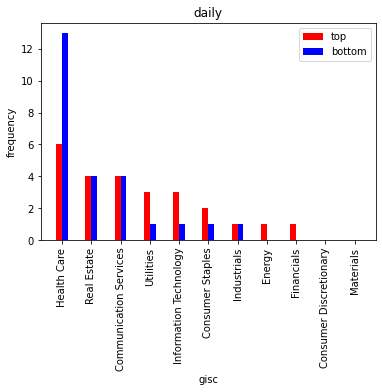

In [41]:
top_25 = dict(top_gain_loss_daily["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_daily["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
# print(labels)
# print(top_25)
# print(bottom_25)
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
# print(top_25)
# print(bottom_25)
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

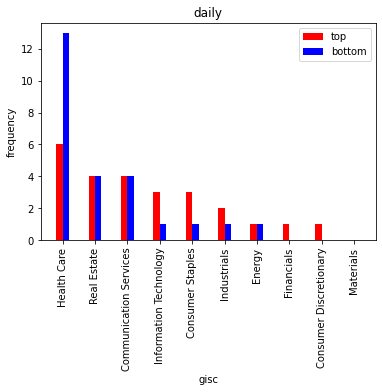

In [42]:
top_25 = dict(top_gain_loss_weekly["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_weekly["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
labels
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
        # top,bottom
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

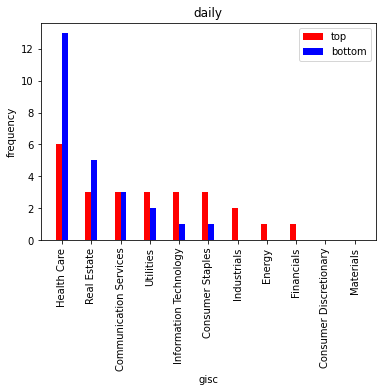

In [43]:
top_25 = dict(top_gain_loss_monthly["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_monthly["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
labels
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
        # top,bottom
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

In [44]:
import base64


def spark_line(data, figsize=(4, 0.25), **kwags):
    """
    Returns a HTML image tag containing a base64 encoded sparkline style plot
    """
    data = list(data)

    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)

    img = io.BytesIO()
    plt.savefig(img, transparent=True, bbox_inches='tight')
    img.seek(0)
    plt.close()

    return base64.b64encode(img.read()).decode("UTF-8")

In [45]:
top_four = list()
top_2 = top_gain_loss_daily.head(2)
for sym in top_2["symbol"]:
    tsym = daily_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(daily_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Daily top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_daily.tail(2)
for sym in bottom_2["symbol"]:
    tsym = daily_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(daily_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Daily bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [46]:
top_four = list()
top_2 = top_gain_loss_weekly.head(2)
for sym in top_2["symbol"]:
    tsym = weekly_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(weekly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Weekly top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_weekly.tail(2)
for sym in bottom_2["symbol"]:
    tsym = weekly_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(weekly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Weekly bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [47]:
top_four = list()
top_2 = top_gain_loss_monthly.head(2)
for sym in top_2["symbol"]:
    tsym = monthly_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(monthly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Monthly top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_monthly.tail(2)
for sym in bottom_2["symbol"]:
    tsym = monthly_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(monthly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Monthly bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [48]:
pip install pdfcrowd

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pdfcrowd

client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('spark1.html', 'spark1.pdf')